# Q1

## Initilization

In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot  as plt

from math import exp, sin, log, cos, ceil


## Part one

In [2]:
def plot(function, start, end):
    x = np.linspace(start, end, 100)
    plt.plot(x, function(x), color='red')
    plt.show()

In [3]:
def func_1(x):
    return (x ** 4 * np.exp(x) - np.sin(x)) / 2

def func_2(x):
    return 5 * np.log10(np.sin(5 * x) + x ** (1 / 2))

def func_3(x):
    return np.cos(5 * np.log10(x)) - (x ** 3) / 10

====بخش اول آ)====
--------Function 1--------
It is Convex


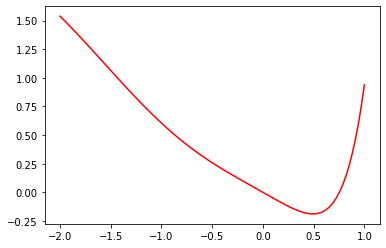

--------Function 2--------
It is not Convex


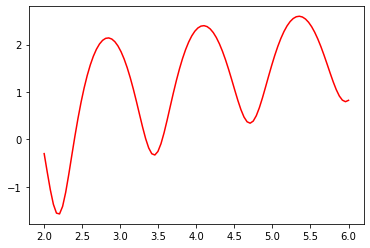

--------Function 3--------
It is not Convex


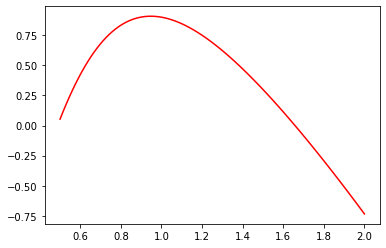

In [4]:
print("====بخش اول آ)====")

print("--------Function 1--------")
print("It is Convex")
plot(func_1, -2, 1)

print("--------Function 2--------")
print("It is not Convex")
plot(func_2, 2, 6)

print("--------Function 3--------")
print("It is not Convex")
plot(func_3, 0.5, 2)

(بخش اول ب

برای این کار می توانیم تابع را نسبت به محور افقی قرینه کنیم و از الگوریتم کاهش گرادیان استفاده کنیم

همینطور میتوانیم الگوریتمی مشابه الگوریتم کاهش گرادیان را استفاده کنیم. با این تفاوت که به جای این که در خلاف جهت گرادیان حرکت کنیم، در جهت گرادیان حرکت کنیم

## Part Two

In [5]:
STEP = 0.01
EARLY_STOP_ITERATION = 3
PRECISION = STEP / 1000
def gradient_descent(function, learning_rate, max_try_count, start_range, end_range, 
                     step=STEP, precision=PRECISION, early_stop_iteration=EARLY_STOP_ITERATION):
    iteratoin_same_count = 0
    next_value = random.uniform(start_range, end_range)
    for try_index in range(max_try_count):
        y_2 = function(next_value + step)
        y_1 = function(next_value)
        if abs(y_2 - y_1) < precision:
            if iteratoin_same_count == early_stop_iteration:
                return next_value
            iteratoin_same_count +=1
        else:
            iteratoin_same_count = 0
        next_value = next_value - learning_rate * (y_2 - y_1) / step
        if next_value < start_range or next_value > end_range:
            next_value = random.uniform(start_range, end_range)
    return next_value

In [7]:
MAX_TRY_COUNT = 50
print("====بخش دوم آ)====")
for run in range(3):
    print(f'----{run+1}th run----')
    for learning_rate in [0.1, 0.4, 0.6, 0.9]:
        print(gradient_descent(func_1, learning_rate, MAX_TRY_COUNT, start_range=-2, end_range=1))

====بخش دوم آ)====
----1th run----
0.487828671461929
0.4878928509154874
0.4207838638791054
-0.1529748486085244
----2th run----
0.48783396792210587
0.4878927013072284
0.4207977880068101
-0.15297467233837536
----3th run----
0.4878165469330605
0.4878966283658325
0.5370727179253231
-0.15297480436887811


(بخش دوم ب

با توجه به تکرار ران های مختلف می توان گفت که مقادیر 0.1 و 0.4 به اندازه کافی کوچک هستند که می توانند به سمت جواب درست همگرا شوند

در مورد مقادر 0.6 می توان گفت که لزوما همگرا نمیشود

همین طور می توان در مورد 0.9 گفت که به علت این که قدم هایی که به سمت هدف بر میداریم به قدری بزرگ هستند که مدام از روش رد میشیم و به همین علت همگرا نمی شود

In [8]:
def find_min(function, start, end, step=STEP):
    min_x = None 
    min_y = 100000
    for x in np.arange(start, end, step):
        if function(x) < min_y:
            min_y = function(x)
            min_x = x
    return min_x

In [9]:
func_2_min = find_min(func_2, 2, 6)
func_2_correct_ans = [0, 0, 0, 0]

acceptable_precision = 0.01

for i in range(1000):
    for index, learning_rate in enumerate([0.1, 0.4, 0.6, 0.9]):
        func_2_gd_min = gradient_descent(func_2, learning_rate, MAX_TRY_COUNT, start_range=2, end_range=6)
        if abs(func_2_gd_min - func_2_min) < acceptable_precision:
            func_2_correct_ans[index] = func_2_correct_ans[index] + 1
            

print("====بخش دوم ج)====")
print(f"minimum of second function = {find_min(func_2, 2, 6)}")
print(f"learning rate={0.1} -> {func_2_correct_ans[0]/1000 * 100}%")
print(f"learning rate={0.4} -> {func_2_correct_ans[1]/1000 * 100}%")
print(f"learning rate={0.6} -> {func_2_correct_ans[2]/1000 * 100}%")
print(f"learning rate={0.9} -> {func_2_correct_ans[3]/1000 * 100}%")

====بخش دوم ج)====
minimum of second function = 2.189999999999996
learning rate=0.1 -> 0.0%
learning rate=0.4 -> 0.3%
learning rate=0.6 -> 0.3%
learning rate=0.9 -> 0.5%


## Part Three

In [10]:
STEP = 0.01
NEWTON_RAPHSON_ITERATION = 50
PRECISION = STEP / 1000
def newton_raphson(function, start_range, end_range, 
                   step=STEP, precision=PRECISION, newton_raphson_iteration=NEWTON_RAPHSON_ITERATION):
    
    next_value = random.uniform(start_range, end_range)
    for i in range(newton_raphson_iteration):
        y_1_prime = (function(next_value + step) - function(next_value)) / step
        y_2_prime = (function(next_value) - function(next_value - step)) / step
        y_second_partial = (y_1_prime - y_2_prime) / step
        next_value = next_value - y_1_prime / y_second_partial
    return next_value

In [13]:
print("====بخش سوم آ)====")
for run in range(3):
    print(f'----{run+1}th run----')
    print(newton_raphson(func_1, start_range=-2, end_range=1))

====بخش سوم آ)====
----1th run----
-45.55809347705193
----2th run----
-3.2582034232426915
----3th run----
0.48790449934619173


(بخش سوم ب

می توان مشاهده کرد که در این روش، نقطه شروع (که به صورت رندم انتخاب شده است) خیلی به همگرا یا واگرایی بستگی دارد و با انتخاب نقطه ی شروع مناسب می توان به هدف مور نظر همگرا شد

In [14]:
func_2_min = find_min(func_2, 2, 6)
func_2_correct_ans = 0

acceptable_precision = 0.01

for i in range(1000):
    func_2_gd_min = newton_raphson(func_2, start_range=2, end_range=6)
    if abs(func_2_gd_min - func_2_min) < acceptable_precision:
        func_2_correct_ans += 1
            

print("====بخش سوم ج)====")
print(f"minimum of second function = {find_min(func_2, 2, 6)}")
print(f"newton_raphson -> {func_2_correct_ans/1000 * 100}%")


C:\Users\hamid\AppData\Local\Temp/ipykernel_17952/1507532930.py:5: RuntimeWarning: invalid value encountered in log10
  return 5 * np.log10(np.sin(5 * x) + x ** (1 / 2))
C:\Users\hamid\AppData\Local\Temp/ipykernel_17952/1507532930.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return 5 * np.log10(np.sin(5 * x) + x ** (1 / 2))


====بخش سوم ج)====
minimum of second function = 2.189999999999996
newton_raphson -> 4.8%


با توجه به نتیجه بدست آمده می توان گفت که برای تابع هایی که محدب یا مقعر هستند،روش کاهش گرادیان لزوما به جواب بهینه همگرا میشود

اما برای تابع هایی که نه مقعر هستند و نه محدب، احتمال رسیدن به جواب در روش نیوتون رافسون بیشتر است و بهتر است از این روش استفاده کنیم

## Part Four

In [15]:
STEP = 0.01
EARLY_STOP_ITERATION = 3
PRECISION = STEP / 1000
def gradient_descent_two(function, learning_rate, max_try_count, start_range, end_range, 
                         step=STEP, precision=PRECISION, early_stop_iteration=EARLY_STOP_ITERATION):
    iteratoin_same_count = 0
    next_value_x = random.uniform(start_range, end_range)
    next_value_y = random.uniform(start_range, end_range)
    next_value_x_list = [next_value_x]
    next_value_y_list = [next_value_y]
    for try_index in range(max_try_count):
        y_x_prime = (function(next_value_x + step, next_value_y) - function(next_value_x, next_value_y)) / step
        y_y_prime = (function(next_value_x, next_value_y + step) - function(next_value_x, next_value_y)) / step
        
        y_1 = function(next_value_x, next_value_y)
        y_2 = function(next_value_x - learning_rate * y_x_prime, next_value_y - learning_rate * y_y_prime)
    
        if abs(y_2 - y_1) < precision:
            if iteratoin_same_count == early_stop_iteration:
                return next_value_x_list, next_value_y_list
            iteratoin_same_count +=1
        else:
            iteratoin_same_count = 0
        next_value_x = next_value_x - learning_rate * y_x_prime
        next_value_y = next_value_y - learning_rate * y_y_prime
        if next_value_x < start_range or next_value_x > end_range:
            next_value_x = random.uniform(start_range, end_range)
        if next_value_y < start_range or next_value_y > end_range:
            next_value_y = random.uniform(start_range, end_range)
            
        next_value_x_list.append(next_value_x)
        next_value_y_list.append(next_value_y)
    return next_value_x_list, next_value_y_list

In [16]:
def draw_points(func, x_1_sequence, x_2_sequence):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    X1, X2 = np.meshgrid(np.linspace(-15.0, 15.0, 1000), np.linspace(-15.0, 15.0, 1000))
    Y = func(X1, X2)
    f_sequence = [func(x_1_sequence[i], x_2_sequence[i]) for i in range(len(x_1_sequence))]

    # First subplot
    ax = fig.add_subplot(1, 2, 1)

    cp = ax.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
    ax.clabel(cp, inline=1, fontsize=10)
    cp = ax.contourf(X1, X2, Y, )
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.scatter(x_1_sequence, x_2_sequence, s=10, c="y")

    # Second subplot
    ax = fig.add_subplot(1, 2, 2, projection='3d')

    ax.contour3D(X1, X2, Y, 50, cmap="Blues")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter3D(x_1_sequence, x_2_sequence, f_sequence, s=10, c="r")

    plt.show()

learning rate=0.01


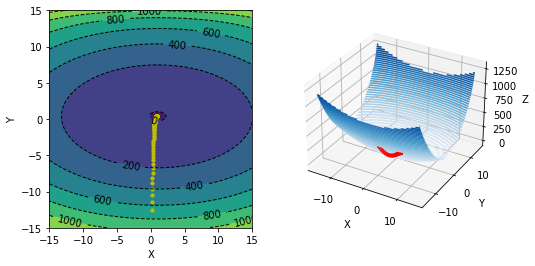

learning rate=0.1


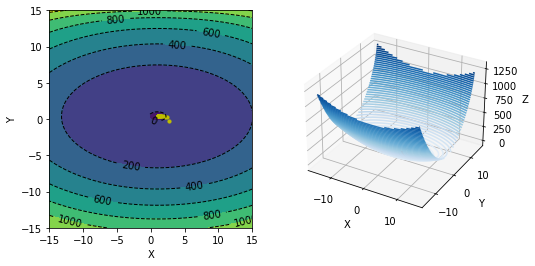

learning rate=0.18


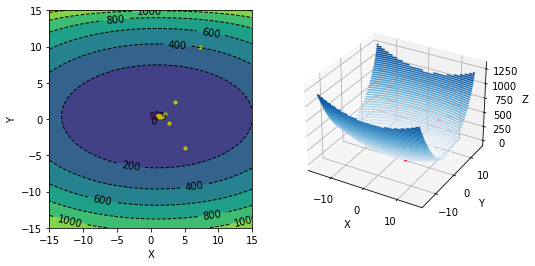

learning rate=0.25


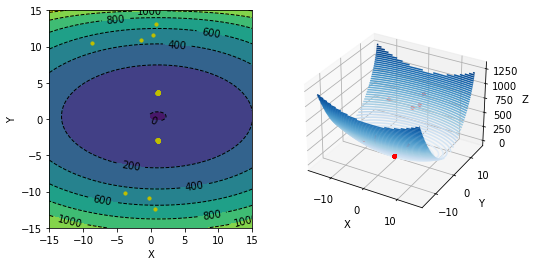

In [19]:
def func_4(x, y):
    return 2 ** x / 10000 + np.exp(y) / 20000 + x ** 2 + 4 * y ** 2 - 2 * x - 3 * y

MAX_TRY_COUNT = 200

for learning_rate in [0.01, 0.1, 0.18, 0.25]:
    next_value_x_list, next_value_y_list = gradient_descent_two(func_4, learning_rate, MAX_TRY_COUNT, -15, 15)
    print(f"learning rate={learning_rate}")
    draw_points(func_4, next_value_x_list, next_value_y_list)

با توجه به نمودار های بالا می توان گفت:

learning_rate = 0.01:به جواب همگرا می شود ولی با تعداد قدم های زیاد

learning_rate = 0.1:به تعداد قدم های مناسب به جواب همگرا میشود

learning_rate = 0.18:می توان گفتش که با تعداد قدم های کمتری به نسبت حالت های قبلی با تقریب خوبی همگرا میشود

learning_rate = 0.25:قدم ها به قدری بزرگ میشود که مداد از این ور دره به اون ور دره می رود و نمی تواند به جواب همگرا شود

## Part Five

In [27]:
random.random()

0.19675863587712739

In [28]:
def simiulated_annealing(function, stopping_T, early_stop_iteration, alpha, initial_T, gamma, start_range, end_range):
    
    def cost_function(x):
        return -function(x)
    
    
    current = random.uniform(start_range, end_range)
    T = initial_T
    for i in range(early_stop_iteration):
        if initial_T <= stopping_T:
            return current
        next_value = random.uniform(current - alpha, current + alpha)
        delta_E = cost_function(next_value) - cost_function(current)
        if delta_E > 0:
            current = next_value
        else:
            probebility = exp(delta_E / T)
            if random.random() <= probebility:
                current = next_value
        T = T * gamma
    
    return current

In [81]:
simiulated_annealing(func_2, 1, 400, 0.01, 500, 0.5, 2, 6)

4.703152869674077

In [89]:
func_2_min = find_min(func_2, 2, 6)

print("====بخش پنجم)====")
acceptable_precision = 0.01
for run in range(3):
    func_2_correct_ans = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    print(f"---run {run + 1}---")
    for index, alpha in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]):
        for i in range(1000):
            func_2_sa_min = simiulated_annealing(func_2, 1, 400, alpha, 500, 0.5, 2, 6)
            if abs(func_2_sa_min - func_2_min) < acceptable_precision:
                func_2_correct_ans[index] = func_2_correct_ans[index] + 1


    for index, alpha in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]):
        print(f"learning rate={alpha} -> {round(func_2_correct_ans[index]/1000 * 100, 2)}%")

====بخش پنجم)====
---run 1---


C:\Users\hamid\AppData\Local\Temp/ipykernel_17952/1507532930.py:5: RuntimeWarning: invalid value encountered in log10
  return 5 * np.log10(np.sin(5 * x) + x ** (1 / 2))
C:\Users\hamid\AppData\Local\Temp/ipykernel_17952/1403618790.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  probebility = exp(delta_E / T)


learning rate=0.1 -> 22.7%
learning rate=0.2 -> 17.6%
learning rate=0.3 -> 19.0%
learning rate=0.4 -> 18.4%
learning rate=0.5 -> 17.1%
learning rate=0.6 -> 19.4%
learning rate=0.7 -> 20.2%
learning rate=0.8 -> 19.8%
learning rate=0.9 -> 18.0%
learning rate=1 -> 17.2%
---run 2---
learning rate=0.1 -> 20.0%
learning rate=0.2 -> 21.5%
learning rate=0.3 -> 19.0%
learning rate=0.4 -> 16.9%
learning rate=0.5 -> 17.8%
learning rate=0.6 -> 19.3%
learning rate=0.7 -> 19.5%
learning rate=0.8 -> 17.6%
learning rate=0.9 -> 15.6%
learning rate=1 -> 17.3%
---run 3---
learning rate=0.1 -> 20.6%
learning rate=0.2 -> 20.3%
learning rate=0.3 -> 19.0%
learning rate=0.4 -> 20.2%
learning rate=0.5 -> 19.4%
learning rate=0.6 -> 18.9%
learning rate=0.7 -> 17.0%
learning rate=0.8 -> 17.1%
learning rate=0.9 -> 15.6%
learning rate=1 -> 17.5%


نتایج سه ران از خواسته ی سوال نشان میدهد که آفلا هر چه بیشتر می شود، احتمال رسیدن به جواب بهینه نیز کمتر میشود.
با توجه به نتایج آلفای 0.1 و 0.2 می تواند گزینه های مناسبی باشد.

باید توجه شود که احتمال های بدست آمده، می تواند مقداری متفاوت باشد بسته به دما ها و مقدایری که به تابع می دهیم.

حال اگر نتایح این بخش را با بخش های قبلی مقایسه کنیم، متوجه می شویم که به طرز معنا داری این الگورتیم به نسبت دو راه قبلی برای تابع هایی که نه مقعر هستند و نه محدب، خوب کار می کند.